In [1]:
%matplotlib inline
%pylab inline

# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell
from jupyterthemes import jtplot

jtplot.style(theme='grade3')
jtplot.style(theme='grade3')
jtplot.style(theme='grade3')

import numpy as np
import csv
import os
from multistep_lstm_company_no_differencing import MultiStepLSTMCompanyNoDifferencing
from multistep_lstm_company import MultiStepLSTMCompany

from datetime import date
import math



Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


Preprocessing the data
Retrieved price series and raw pd from disk


D:\Github\Hons-Project\code\company.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  relevant_series_range.dropna(inplace=True)


Preprocessed data in  0.006912684440612793 mins
Fitting the model
Model Type:  vanilla
train X size: 61  shape: (61, 1, 3) train y size: 61  shape:  (61, 1)
Training model with batch size 61
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (61, 3)                   84        
_________________________________________________________________
dense_9 (Dense)              (61, 1)                   4         
Total params: 88
Trainable params: 88
Non-trainable params: 0
_________________________________________________________________


New model with batch size 1 for prediction
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (1, 3)                    84        
_________________________________________________________________
dense_10 (Dense)             (1, 1)       

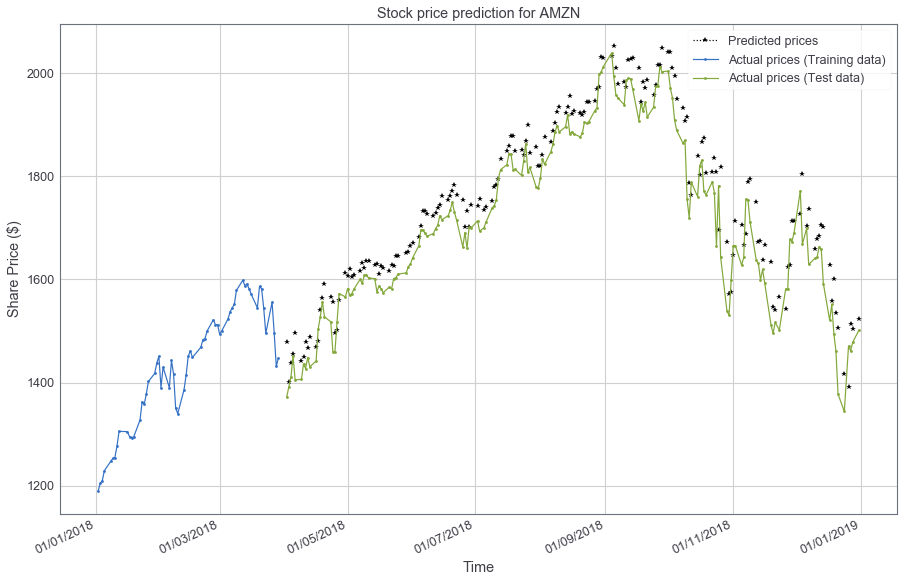

Correct counts:  105   Size of test set: 190
t+1 APRE: 0.026485
LSTM RMSE Score: US dollar [54.443716035360566]
LSTM Trend Score:  [0.5526315789473685]
LSTM APRE Score: US dollar [0.026485308139544854]


In [16]:
indicators = ["price", "sma", "ema"]
model_types = ["vanilla"] #, "stacked", "bi", "cnn", "conv"] # ["vanilla", "stacked", "bi", "cnn", "conv"] #"conv",
start_train_date = "01/01/2018"
end_train_start_test_date = "01/04/2018"
end_test_date = "01/01/2019"

for m in model_types:
    obj = MultiStepLSTMCompany("AMZN", start_train_date, end_train_start_test_date, end_test_date, 
                             n_lag=1, n_seq=1, n_epochs=500, n_batch="full_batch", 
                               tech_indicators=indicators, model_type=m)
    obj.train()
    jtplot.style(theme='grade3')
    jtplot.style(theme='grade3')
    jtplot.style(theme='grade3')
    predictions = obj.predict()
    obj.plot(predictions, "01/01/2018", "01/01/2019")
    trend_score = obj.score(metric="trend", predictions=predictions)
    lstm_score = obj.score(metric="rmse", predictions=predictions)
    apre_score = obj.score(metric="apre", predictions=predictions)
    print("LSTM RMSE Score: US dollar", lstm_score)
    print("LSTM Trend Score: ", trend_score)
    print("LSTM APRE Score: US dollar", apre_score)
#obj.supervised_pd

In [3]:
X, y = obj.train_scaled[:, 0:obj.n_lag * obj.number_of_indicators], \
               obj.train_scaled[:, obj.n_lag * obj.number_of_indicators:]
X.shape
X_new = X.reshape(X.shape[0], 1, 1, obj.n_lag, obj.number_of_indicators)
print(X_new.shape)

(4528, 1, 1, 3, 52)


In [21]:
obj.get_filtered_series(obj.timeseries_to_supervised(obj.raw_pd, 1,1), start_train_date, end_test_date)

D:\Github\Hons-Project\code\company.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  relevant_series_range.dropna(inplace=True)


,Share Price(t-1),SMA(t-1),EMA(t-1),Share Price(t),SMA(t),EMA(t)
date,,,,,,
2018-01-02,1169.47,1168.8415,1168.7788,1189.01,1170.1745,1170.7056
2018-01-03,1189.01,1170.1745,1170.7056,1204.20,1173.6870,1173.8955
2018-01-04,1204.20,1173.6870,1173.8955,1209.59,1177.0880,1177.2950
2018-01-05,1209.59,1177.0880,1177.2950,1229.14,1180.9275,1182.2326
2018-01-08,1229.14,1180.9275,1182.2326,1246.87,1185.2815,1188.3885
2018-01-09,1246.87,1185.2815,1188.3885,1252.70,1189.8165,1194.5134
2018-01-10,1252.70,1189.8165,1194.5134,1254.33,1194.0870,1200.2103
2018-01-11,1254.33,1194.0870,1200.2103,1276.68,1199.6670,1207.4931
2018-01-12,1276.68,1199.6670,1207.4931,1305.20,1206.7205,1216.7985
